In [16]:
import numpy as mp
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [18]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [24]:
X_train = X_train/255.0
X_test = X_test/255.0

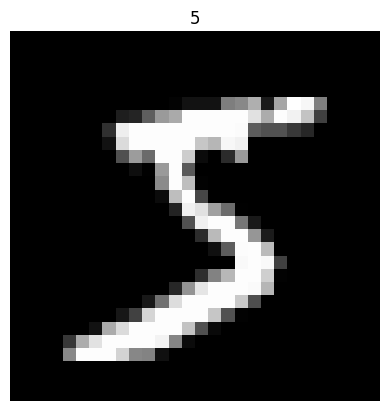

In [25]:
def show_image(image,label):
    plt.imshow(image,cmap = 'grey')
    plt.axis('off')
    plt.title(label)

show_image(X_train[0],y_train[0])

In [31]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train,y_train, epochs = 3, batch_size = 32, validation_split = 0.2)

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8395 - loss: 0.5143 - val_accuracy: 0.9800 - val_loss: 0.0662
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.9695 - loss: 0.0979 - val_accuracy: 0.9868 - val_loss: 0.0458
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 74s 26ms/step - accuracy: 0.9797 - loss: 0.0684 - val_accuracy: 0.9886 - val_loss: 0.0388


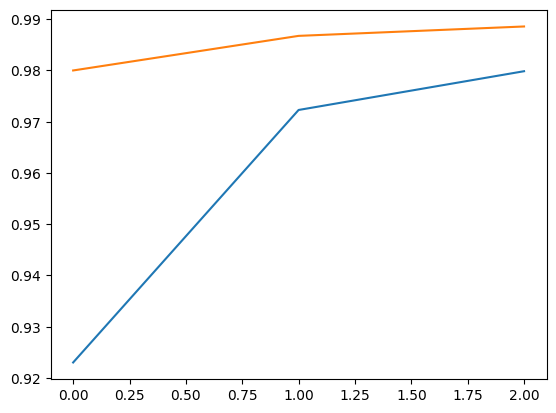

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
y_preds = mp.argmax(model.predict(X_test),axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [50]:
y_preds

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
accuracy_score(y_preds,y_test)

0.9884

In [52]:
import seaborn as sns

<Axes: >

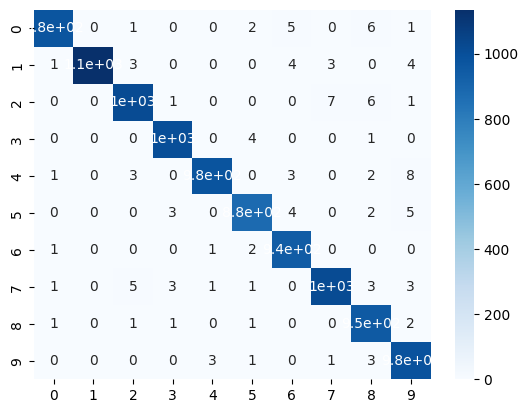

In [56]:
sns.heatmap(confusion_matrix(y_preds,y_test), annot = True, cmap='Blues')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


C:\Python 320\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.7552 - loss: 0.7847 - val_accuracy: 0.9755 - val_loss: 0.0866
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.9621 - loss: 0.1292 - val_accuracy: 0.9831 - val_loss: 0.0605
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.9715 - loss: 0.0952 - val_accuracy: 0.9863 - val_loss: 0.0492
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9789 - loss: 0.0709 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9805 - loss: 0.0614 - val_accuracy: 0.9877 - val_loss: 0.0423
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9831 - loss: 0.0548 - val_accuracy: 0.9886 - val_loss: 0.0419
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9888 - val_loss: 0.0393
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9874 - loss: 0.0414 - 

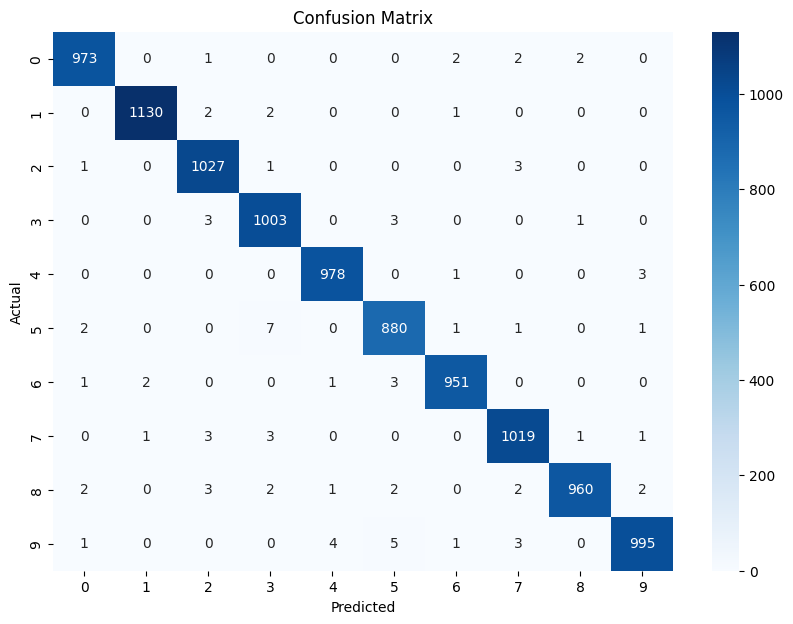

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit the model input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

In [2]:
x_train.shape

(60000, 28, 28, 1)

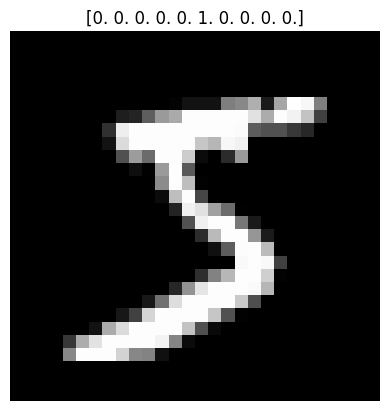

In [4]:
def show_image(image,label):
    plt.imshow(image,cmap = 'grey')
    plt.axis('off')
    plt.title(label)

show_image(x_train[0],y_train[0])